# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

## 0. 환경 설정하기

### 1) 구글 드라이브 연결하기

In [1]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2) 경로 확인하기
- "WORK_SPACE" 에 본인 작업 경로 작성 후 실행(구글 드라이브 최상위에 압축해제 시 그대로 실행. 수정 X).<br>

<font color="red">※ 주의. 나머지 경로는 절대 변경하지 마세요.</font>

In [2]:
# ROOT_PATH 확인 
import os

# 구글 드라이브 내 프로젝트 압축해제된 영역 (구글 드라이브 최상위에 압축해제하였을 경우 수정하지 않으셔도 됩니다.)
WORK_SPACE = ""

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = "/content/drive/MyDrive"+WORK_SPACE+"/AIVLE3rd_individual"
else :
  ROOT_PATH = os.path.abspath('..')

# 영상 파일 경로
VIDEO_PATH = ROOT_PATH + "/video"
# 영상을 분할한 이미지 경로
IMAGE_PATH = ROOT_PATH + "/image"
TRAIN_PATH = ROOT_PATH + "/train"

### 3) 비디오 데이터 다운로드하기
아래 코드를 실행하세요.

In [3]:
# test data 다운로드
!pip install gdown

import gdown
import shutil
import zipfile
 
google_path = 'https://drive.google.com/uc?id='
file_id = '1C3e9zD2_FWqk0va0UcG1kOEHoBdvhpca'
output_name = 'video.zip'

# 파일 다운로드
gdown.download(google_path+file_id,output_name,quiet=False)

# 파일 위치 이동
shutil.move("./" + output_name, ROOT_PATH)

zip_file = ROOT_PATH + "/" + output_name

# 압축해제 
with zipfile.ZipFile(zip_file) as z:
    z.extractall(ROOT_PATH)

os.remove(zip_file)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=1C3e9zD2_FWqk0va0UcG1kOEHoBdvhpca
To: /content/video.zip
100%|██████████| 525M/525M [00:02<00:00, 249MB/s]


### 4) 라이브러리 불러오기
필요시 추가 라이브러리는 설치해서 사용하세요.

In [3]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

---

# 데이터 탐색부터 먼저 시작해보겠습니다.

## ▣ 데이터 소개
[기본 데이터]
* 원본 영상 : 슈퍼맨이 돌아왔다 '21년 7월 영상을 출연진 별로 가공한 영상
* 파일 경로 : .VIDEO_PATH = "./video"
* 파일명 : park.mp4, sam.mp4, sayuri.mp4, jung.mp4

---

## 1. 데이터 불러오기

### 1) 비디오 데이터 확인하기

<font color="green">[실습문제]</font> 1. 비디오 데이터들의 경로를 <u>LIST</u>에  저장하기
* 파일 경로에서 파일들의 경로를 변수명 "video_list" 리스트에 저장하세요. 
> <font color="red"><b>[Hint]</b></font> <br>
> 비디오 파일 경로는 <u>'VIDEO_PATH'</u> 입니다.<br>
> 영상 파일 확장자는 <u>'mp4'</u> 입니다. <br>
> 라이브러리 <u>'glob'</u>을 활용하여 파일들 경로 리스트를 만들 수 있습니다.

In [5]:
VIDEO_PATH

'/content/drive/MyDrive/AIVLE3rd_individual/video'

In [4]:
# 실습해보세요.
video_list = glob.glob(VIDEO_PATH + "/*.mp4")
video_list

['/content/drive/MyDrive/AIVLE3rd_individual/video/sam.mp4',
 '/content/drive/MyDrive/AIVLE3rd_individual/video/jung.mp4',
 '/content/drive/MyDrive/AIVLE3rd_individual/video/park.mp4',
 '/content/drive/MyDrive/AIVLE3rd_individual/video/sayuri.mp4']

<font color="green">[실습문제]</font> 2. 비디오 파일들의 졍보를 확인하세요. (openCV 활용)



In [6]:
TMP_TRAIN_PATH = ROOT_PATH + "/tmp_train"

In [7]:
# 실습해보세요.
## 영상의 파일 이름, 영상의 가로, 세로, 총 프레임 수, FPS 정보, 영상 길이
for i, path in enumerate(video_list):
  video = cv2.VideoCapture(path)

  if video.isOpened():
    video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
    video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
    video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)
    video_fps = video.get(cv2.CAP_PROP_FPS)

    print("%d번째 동영상" %i)
    print("가로 : ", video_width)
    print("세로 : ", video_height)
    print("총 프레임 수 :", video_length)
    print("fps :", video_fps)
    print("영상 길이 : %d 초" %round(video_length/video_fps))
    print()

    video.release() # 비디오 할당 해제

0번째 동영상
가로 :  854.0
세로 :  480.0
총 프레임 수 : 27001.0
fps : 30.0
영상 길이 : 900 초

1번째 동영상
가로 :  854.0
세로 :  480.0
총 프레임 수 : 27001.0
fps : 30.0
영상 길이 : 900 초

2번째 동영상
가로 :  854.0
세로 :  480.0
총 프레임 수 : 37801.0
fps : 30.0
영상 길이 : 1260 초

3번째 동영상
가로 :  854.0
세로 :  480.0
총 프레임 수 : 37801.0
fps : 30.0
영상 길이 : 1260 초



### 2) 동영상 프레임 단위로 나눠 이미지 데이터 만들기

<font color="green">[실습문제]</font> 3. 이미지 추출하여 저장하기
* 위에서 저장한 "video_list"에 있는 파일들을 분할하여 이미지 데이터로 만드세요.
* 이미지 저장 경로 : IMAGE_PATH = ROOT_PATH + "/image" <br>
> <font color="red"><b>[Hint]</b></font> <br>
> 파일의 경로가 저장된 video_list를 for문을 활용해서 하나씩 불러오세요.

In [11]:
# 실습해보세요.
image_list = ["sam", "jung", "park", "sayuri"]
TIME_MEASUERMENT_UNIT = 10 # 자를 시간 단위 1초

for i, path in enumerate(video_list):
  print(path)
  video = cv2.VideoCapture(path)

  while video.isOpened():
    ret, frame = video.read()
    if ret:
      # 현재 프레임 위치 (msec) 
      frame_sec = video.get(cv2.CAP_PROP_POS_MSEC) / 1000
      if frame_sec.is_integer():
        if (frame_sec % TIME_MEASUERMENT_UNIT == 0):
          #filename = IMAGE_PATH + "/" + image_list[i] + "/" + str(round(frame_sec)) + ".jpg"
          #print(filename)
          #cv2.imwrite(filename, frame)
          filename = TMP_TRAIN_PATH + "/" + image_list[i] + "/" + str(round(frame_sec)) + ".jpg"
          print(filename)
          cv2.imwrite(filename, frame)

    else:
      break

  video.release()


/content/drive/MyDrive/AIVLE3rd_individual/video/sam.mp4
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/0.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/10.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/20.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/30.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/40.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/50.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/60.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/70.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/80.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/90.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/100.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/110.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/120.jpg
/content/drive/MyDrive/AIVLE3rd_individual/tmp_train/sam/130.jpg
/content/drive/MyDrive/AIVLE3rd_individual/t

<font color="green">[실습문제]</font> 4. 이미지 파일 열어서 확인하기
* 전체 이미지 중 각 출연진 별로 5장을 열어서 확인해보세요.
> <font color="red"><b>[Hint]</b></font> <br>
> matplotlib subplot() 함수를 사용해 보세요.<br>
> 참고1. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html# <br>
> 참고2. https://foss4g.tistory.com/1263

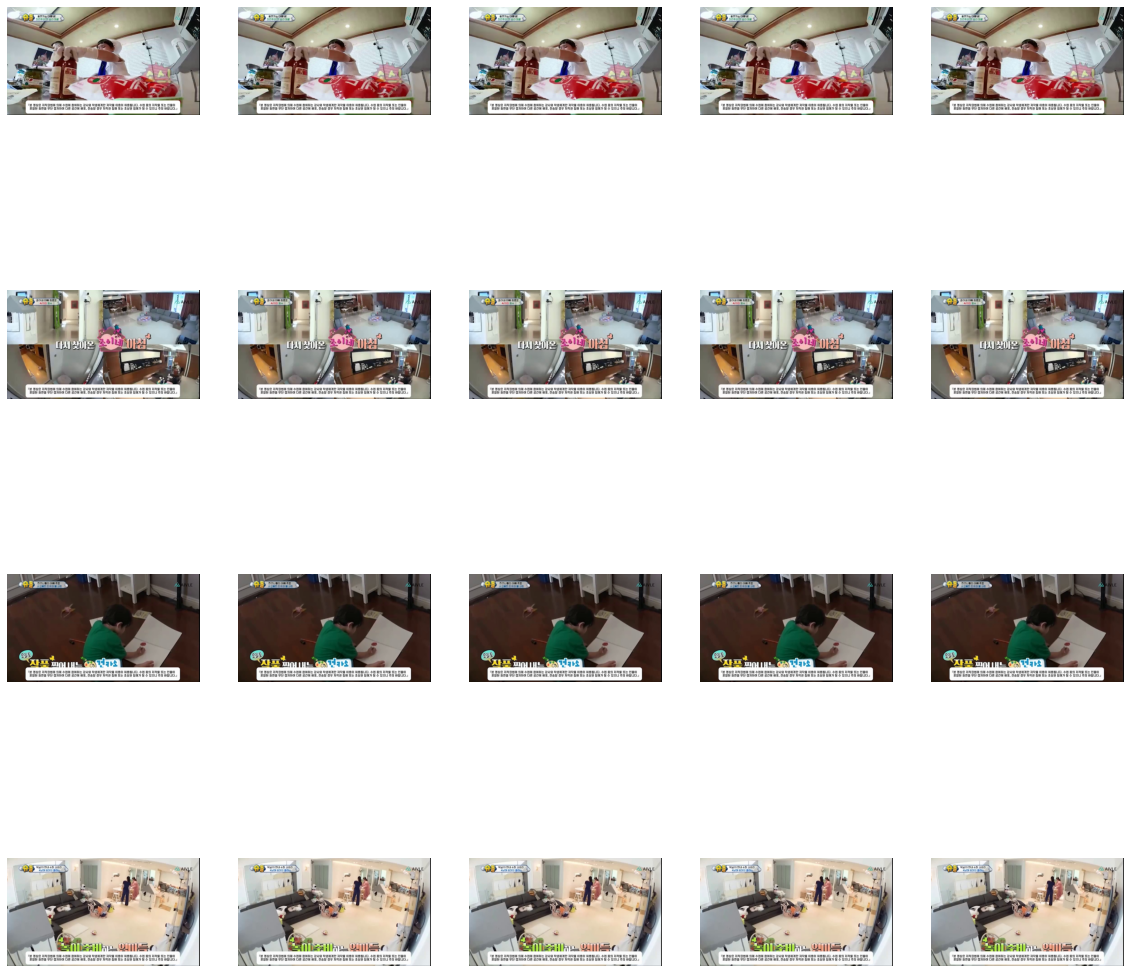

In [37]:
plt.figure(figsize=(20, 20))

for i, name in enumerate(image_list):
  for j in range(5):
    plt.subplot(4, 5, (i * 5) + j + 1)
    image = cv2.imread(TRAIN_PATH + "/" + name +"/" + str(i) + ".jpg", )
    image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image2)
    plt.axis('off')